In [18]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('yelp.csv')

In [5]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   user_id      10000 non-null  object
 6   cool         10000 non-null  int64 
 7   useful       10000 non-null  int64 
 8   funny        10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [6]:
df.describe(include='all')

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
count,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,6403,NaN,NaN,NaN
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,fWKvX83p0-ka4JS3dc6E5A,NaN,Great service,review,fczQCSmaWF78toLEmb0Zsw,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,38,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,NaN,0.876800,1.409300,0.701300
std,NaN,NaN,NaN,1.214636,NaN,NaN,NaN,2.067861,2.336647,1.907942
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000


In [26]:
df['funny'].value_counts()

funny
0     7013
1     1632
2      603
3      271
4      161
5       90
6       68
7       34
8       25
9       21
10      18
11      14
12      11
15       5
16       5
20       5
17       4
13       3
14       3
24       2
22       2
19       2
18       2
21       1
27       1
23       1
30       1
39       1
57       1
Name: count, dtype: int64

In [8]:
df['stars'].value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

In [9]:
df['useful'].value_counts()

useful
0     4130
1     2848
2     1323
3      711
4      335
5      222
6      114
7       91
8       52
9       38
10      29
12      20
11      19
15      17
13      12
14       8
19       6
16       6
17       5
18       5
20       2
28       1
23       1
24       1
76       1
31       1
38       1
30       1
Name: count, dtype: int64

In [15]:
df.drop(columns=['type'],axis=1,inplace=True)

In [17]:
df['text_length'] = df['text'].apply(len)

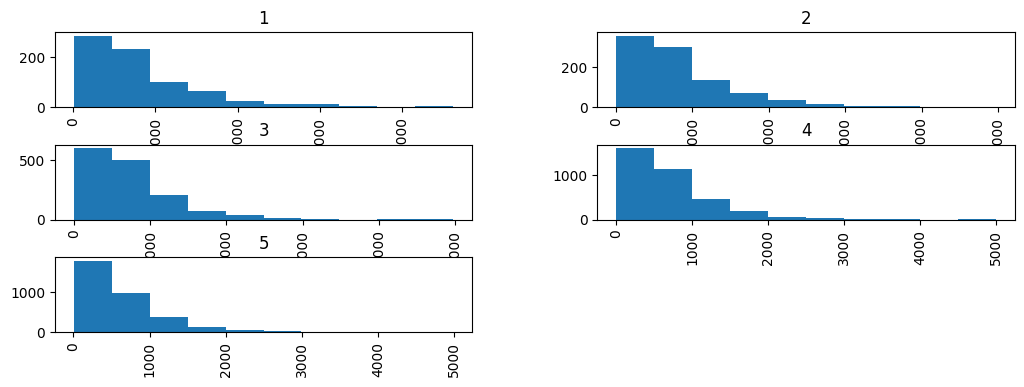

In [22]:
df.hist(column='text_length',by='stars',figsize=(12,4));

C:\Users\mjv2062\AppData\Local\Temp\ipykernel_175672\2210575300.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='stars',y='text_length',palette='rainbow')


<Axes: xlabel='stars', ylabel='text_length'>

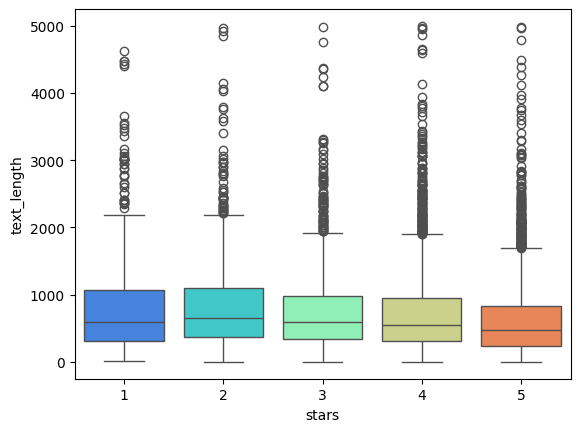

In [34]:
sns.boxplot(df,x='stars',y='text_length',palette='rainbow')

C:\Users\mjv2062\AppData\Local\Temp\ipykernel_175672\2821608670.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='stars',palette='rainbow');


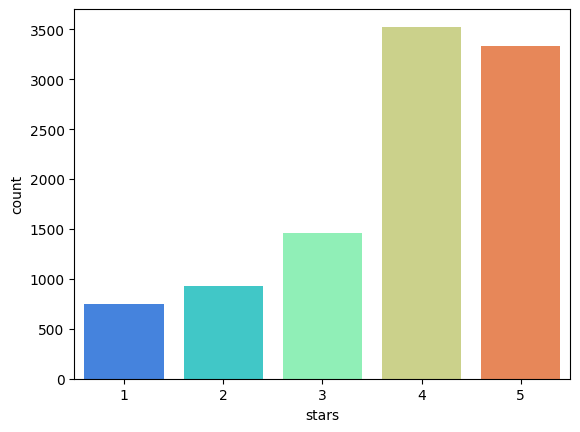

In [32]:
sns.countplot(df,x='stars',palette='rainbow');

In [42]:
df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'user_id', 'cool',
       'useful', 'funny', 'text_length'],
      dtype='object')

In [43]:
stars = df.groupby('stars')[['stars', 'cool','useful', 'funny', 'text_length']].mean()
stars

,stars,cool,useful,funny,text_length
stars,,,,,
1,1.0,0.576769,1.604806,1.056075,826.515354
2,2.0,0.719525,1.563107,0.875944,842.256742
3,3.0,0.788501,1.306639,0.694730,758.498289
4,4.0,0.954623,1.395916,0.670448,712.923142
5,5.0,0.944261,1.381780,0.608631,624.999101


In [44]:
df.head()

,business_id,date,review_id,stars,text,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [45]:
x = df['text']
y=df['stars']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=99)

In [55]:
x_train.shape

(8000,)

In [56]:
y_train.shape

(8000,)

In [73]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import string
from nltk.corpus import stopwords

In [81]:
pipeline1 = Pipeline([ 
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf_transfarmer', TfidfTransformer()),
    ('classifer', MultinomialNB())
])

In [82]:
pipeline1.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000236BA475940>)),
                ('tfidf_transfarmer', TfidfTransformer()),
                ('classifer', MultinomialNB())])

In [83]:
pred_1 = pipeline1.predict(x_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

## Results with using Text Processer

In [87]:
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       152
           2       0.00      0.00      0.00       175
           3       0.00      0.00      0.00       323
           4       0.39      0.91      0.54       706
           5       0.65      0.35      0.46       644

    accuracy                           0.43      2000
   macro avg       0.21      0.25      0.20      2000
weighted avg       0.35      0.43      0.34      2000



c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [88]:
print(confusion_matrix(y_test,pred_1))

[[  0   0   0 123  29]
 [  0   0   0 162  13]
 [  0   0   0 306  17]
 [  0   0   0 642  64]
 [  0   0   0 417 227]]


## Results without using Text_processer

In [70]:
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       152
           2       0.00      0.00      0.00       175
           3       0.00      0.00      0.00       323
           4       0.39      0.91      0.54       706
           5       0.65      0.34      0.44       644

    accuracy                           0.43      2000
   macro avg       0.21      0.25      0.20      2000
weighted avg       0.34      0.43      0.33      2000



c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
print(confusion_matrix(y_test,pred_1))

[[  0   1   0 124  27]
 [  0   0   0 161  14]
 [  0   0   0 308  15]
 [  0   0   0 643  63]
 [  0   0   0 427 217]]
